<img src=".\\diyLogo.png" alt="some_text">
<h1> 第六讲 类初步</h1>
<a id=backup></a>
<H2>目录</H2>  

[6.1 名称和对象](#Section1)      
[6.2 Python作用域和命名空间](#Section2)      
[6.3 初探类](#Section3)   
[6.4 补充说明](#Section4)   
[6.5 继承](#Section5)   
[6.6 私有变量](#Section6)   
[6.7 杂项说明](#Section7)   
[6.8 迭代器](#Section8)   
[6.9 生成器](#Section9)   
[6.10 生成器](#Section10)  

类把数据与功能绑定在一起。创建新类就是创建新的对象 类型，从而创建该类型的新 实例 。类实例具有多种保持自身状态的属性。类实例还支持（由类定义的）修改自身状态的方法。

和其他编程语言相比，Python 只用了很少的新语法和语义就加入了类。Python 的类是 C++ 和 Modula-3 中类机制的结合体，而且支持所有面向对象编程（OOP）的标准特性：类继承机制支持多个基类，派生类可以覆盖基类的任何方法，类的方法可以调用基类中相同名称的方法。对象可以包含任意数量和类型的数据。和模块一样，类也拥有 Python 天然的动态特性：在运行时创建，创建后也可以修改。

在 C++ 术语中，通常类成员（包括数据成员）是 public (例外见下文 私有变量)，所有成员函数都是 virtual。 与在 Modula-3 中一样，没有用于从对象的方法中引用对象成员的简写：方法函数在声明时，有一个显示的参数代表本对象，该参数由调用隐式提供。 与 Smalltalk 一样，类本身也是对象。 这为导入和重命名提供了语义。 与 C++ 和 Modula-3 不同，内置类型可以用作基类，供用户扩展。 此外，与 C++ 一样，大多数具有特殊语法（算术运算符，下标等）的内置运算符都可以为类实例而重新定义。

（由于缺乏关于类的公认术语，我会偶尔使用 Smalltalk、C++ 的术语，我还会使用 Modula-3 的术语，因为它的面向对象语义比 C++ 更接近 Python，但估计没几个读者听说过这门语言。）

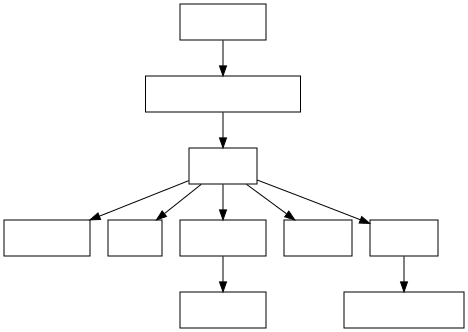

In [10]:
import graphviz
dot=graphviz.Digraph(comment='the round table',name="Python类",node_attr={'shape': 'box'})
dot.node('1','名称对象')
dot.node('2','作用域和命名空间')
dot.node('3','初探类')
dot.node('4','补充说明')
dot.node('5','继承')
dot.node('6','私有变量')
dot.node('7','杂项说明')
dot.node('8','迭代器')
dot.node('9','生成器')
dot.node('A','生成器表达式')
dot.edges(['12','23','34','35','36','67','38','39','9A'])
dot

In [ ]:
help(dot.node)

<a id = Section1> </a>
## 6.1. 名称和对象
对象之间相互独立，多个名称（在多个作用域内）可以绑定到同一个对象。 其他语言称之为别名。Python 初学者通常不容易理解这个概念，处理数字、字符串、元组等不可变基本类型时，可以不必理会。 但是，对涉及可变对象，如列表、字典等大多数其他类型的 Python 代码的语义，别名可能会产生意料之外的效果。这样做，通常是为了让程序受益，因为别名在某些方面就像指针。例如，传递对象的代价很小，因为实现只传递一个指针；如果函数修改了作为参数传递的对象，调用者就可以看到更改 --- 无需 Pascal 用两个不同参数的传递机制。

<a id = Section2> </a>
## 6.2. Python 作用域和命名空间  
在介绍类之前，我首先要告诉你一些 Python 的作用域规则。类定义对命名空间有一些巧妙的技巧，你需要知道作用域和命名空间如何工作才能完全理解正在发生的事情。顺便说一下，关于这个主题的知识对任何高级 Python 程序员都很有用。   

让我们从一些定义开始。

### <font color="blue" > namespace （命名空间）</font> 是一个从名字到对象的映射。
当前大部分命名空间都由 Python 字典实现，但一般情况下基本不会去关注它们（除了要面对性能问题时），而且也有可能在将来更改。 
下面是几个命名空间的例子：
+ 存放内置函数的集合（包含 abs() 这样的函数，和内建的异常等）；
+ 模块中的全局名称；
+ 函数调用中的局部名称。 

<p> 从某种意义上说，对象的属性集合也是一种命名空间的形式。 关于命名空间的重要一点是，不同命名空间中的名称之间绝对没有关系；</p>
<p>例如，两个不同的模块都可以定义一个 maximize 函数而不会产生混淆 --- 模块的用户必须在其前面加上模块名称。</p>

### 任何跟在一个点号之后的名称都称为 <font color="blue" size="3"> 属性</font>   
+ 例如，在表达式 z.real 中，real 是对象 z 的一个属性。按严格的说法，对模块中名称的引用属于属性引用：
+ 在表达式 modname.funcname 中，modname 是一个模块对象而 funcname 是它的一个属性。

在此情况下在模块的属性和模块中定义的全局名称之间正好存在一个直观的映射：它们共享相同的命名空间！

 【注】存在一个例外。 模块对象有一个秘密的只读属性 __dict__，它返回用于实现模块命名空间的字典；__dict__ 是属性但不是全局名称。 显然，使用这个将违反命名空间实现的抽象，应当仅被用于事后调试器之类的场合。

### 属性可以是只读或者可写的。
如果为后者，那么对属性的赋值是可行的。模块属性是可写的，你可以写 modname.the_answer = 42 。可写的属性同样可以用 del 语句删除。例如， del modname.the_answer 将会从名为 modname 的对象中移除 the_answer 属性。

### 命名空间在不同时刻被创建，拥有不同的生存期。
<p> 包含内置名称的命名空间是在 Python 解释器启动时创建的，永远不会被删除。模块的全局命名空间在模块定义被读入时创建；</p>
<p>通常，模块命名空间也会持续到解释器退出。被解释器的顶层调用执行的语句，从一个脚本文件读取或交互式地读取，被认为是 __main__ 模块调用的一部分，因此它们拥有自己的全局命名空间。（内置名称实际上也存在于一个模块中；这个模块被称作 builtins 。）</p>

一个函数的本地命名空间在这个函数被调用时创建，并在函数返回或抛出一个不在函数内部处理的错误时被删除。（事实上，比起描述到底发生了什么，忘掉它更好。）当然，每次递归调用都会有它自己的本地命名空间。

### 一个 作用域 
是一个命名空间可直接访问的 Python 程序的文本区域。 这里的 “可直接访问” 意味着对名称的非限定引用会尝试在命名空间中查找名称。

虽然作用域是静态地确定的，但它们会被动态地使用。 在执行期间的任何时刻，会有 3 或 4 个命名空间可被直接访问的嵌套作用域:

+ 最先搜索的最内部作用域包含局部名称

+ 从最近的封闭作用域开始搜索的任何封闭函数的作用域包含非局部名称，也包括非全局名称

+ 倒数第二个作用域包含当前模块的全局名称

+ 最外面的作用域（最后搜索）是包含内置名称的命名空间

### 如果一个名称被声明为全局变量，则所有引用和赋值将直接指向包含该模块的全局名称的中间作用域。 
要重新绑定在最内层作用域以外找到的变量，可以使用 nonlocal 语句声明为非本地变量。 如果没有被声明为非本地变量，这些变量将是只读的（尝试写入这样的变量只会在最内层作用域中创建一个 新的 局部变量，而同名的外部变量保持不变）。

通常，当前局部作用域将（按字面文本）引用当前函数的局部名称。 在函数以外，局部作用域将引用与全局作用域相一致的命名空间：模块的命名空间。 类定义将在局部命名空间内再放置另一个命名空间。

### 重要的是应该意识到作用域是按字面文本来确定的：
在一个模块内定义的函数的全局作用域就是该模块的命名空间，无论该函数从什么地方或以什么别名被调用。 另一方面，实际的名称搜索是在运行时动态完成的 --- 但是，Python 正在朝着“编译时静态名称解析”的方向发展，因此不要过于依赖动态名称解析！ （事实上，局部变量已经是被静态确定了。）

Python 的一个特殊规定是这样的 -- 如果不存在生效的 global 或 nonlocal 语句 -- 则对名称的赋值总是会进入最内层作用域。 赋值不会复制数据 --- 它们只是将名称绑定到对象。 删除也是如此：语句 del x 会从局部作用域所引用的命名空间中移除对 x 的绑定。 事实上，所有引入新名称的操作都是使用局部作用域：特别地，import 语句和函数定义会在局部作用域中绑定模块或函数名称。

global 语句可被用来表明特定变量生存于全局作用域并且应当在其中被重新绑定；nonlocal 语句表明特定变量生存于外层作用域中并且应当在其中被重新绑定。


## 6.2.1. 作用域和命名空间示例
这个例子演示了如何引用不同作用域和名称空间，以及 global 和 nonlocal 会如何影响变量绑定:

In [7]:
def scope_test():
    def do_local():
        spam = "2.local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "3.nonlocal spam"

    def do_global():
        global spam
        spam = "4.global spam"

    spam = "1.test spam"
    do_local()
    print("After local assignment:", spam,':Fuction do_local  Can\'t change Function scope test\'s locking')
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam,':Fuction do_global  Can\'t change Function do_nonlocal \'s locking')

scope_test()
print("In global scope:", spam)

After local assignment: 1.test spam :Fuction do_local  Can't change Function scope test's locking
After nonlocal assignment: 3.nonlocal spam
After global assignment: 3.nonlocal spam :Fuction do_global  Can't change Function do_nonlocal 's locking
In global scope: 4.global spam


### 请注意 局部 赋值（这是默认状态）不会改变 scope_test 对 spam 的绑定。 
### nonlocal 赋值会改变 scope_test 对 spam 的绑定，而 global 赋值会改变模块层级的绑定。

### 您还可以发现在 global 赋值之前没有 spam 的绑定。

<a id = Section3> </a>
## 6.3. 初探类
类引入了一些新语法，三种新对象类型和一些新语义。

### 6.3.1. 类定义语法
最简单的类定义看起来像这样:

In [ ]:
class ClassName:
    <statement-1>
    .
    .
    .
    <statement-N>

类定义与函数定义 (def 语句) 一样必须被执行才会起作用。 （你可以尝试将类定义放在 if 语句的一个分支或是函数的内部。）

在实践中，类定义内的语句通常都是函数定义，但也允许有其他语句，有时还很有用 --- 我们会稍后再回来说明这个问题。 在类内部的函数定义通常具有一种特别形式的参数列表，这是方法调用的约定规范所指明的 --- 这个问题也将在稍后再说明。

当进入类定义时，将创建一个新的命名空间，并将其用作局部作用域 --- 因此，所有对局部变量的赋值都是在这个新命名空间之内。 特别的，函数定义会绑定到这里的新函数名称。

当（从结尾处）正常离开类定义时，将创建一个 类对象。 这基本上是一个包围在类定义所创建命名空间内容周围的包装器；我们将在下一节了解有关类对象的更多信息。 原始的（在进入类定义之前起作用的）局部作用域将重新生效，类对象将在这里被绑定到类定义头所给出的类名称 (在这个示例中为 ClassName)。



### 6.3.2. 类对象
类对象支持两种操作：属性引用和实例化。

属性引用 使用 Python 中所有属性引用所使用的标准语法: obj.name。 有效的属性名称是类对象被创建时存在于类命名空间中的所有名称。 因此，如果类定义是这样的:

In [ ]:
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'

那么 MyClass.i 和 MyClass.f 就是有效的属性引用，将分别返回一个整数和一个函数对象。 类属性也可以被赋值，因此可以通过赋值来更改 MyClass.i 的值。 __doc__ 也是一个有效的属性，将返回所属类的文档字符串: "A simple example class"。

类的 实例化 使用函数表示法。 可以把类对象视为是返回该类的一个新实例的不带参数的函数。 举例来说（假设使用上述的类）:

In [ ]:
x = MyClass()

创建类的新 实例 并将此对象分配给局部变量 x。

实例化操作（“调用”类对象）会创建一个空对象。 许多类喜欢创建带有特定初始状态的自定义实例。 为此类定义可能包含一个名为 __init__() 的特殊方法，就像这样:

In [ ]:
def __init__(self):
    self.data = []

当一个类定义了 __init__() 方法时，类的实例化操作会自动为新创建的类实例发起调用 __init__()。 因此在这个示例中，可以通过以下语句获得一个经初始化的新实例:

In [ ]:
x = MyClass()

当然，__init__() 方法还可以有额外参数以实现更高灵活性。 在这种情况下，提供给类实例化运算符的参数将被传递给 __init__()。 例如，:

In [ ]:
class Complex:
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

x = Complex(3.0, -4.5)
x.r, x.i

### 6.3.3. 实例对象
现在我们能用实例对象做什么？ 实例对象所能理解的唯一操作是属性引用。 有两种有效的属性名称：数据属性和方法。

数据属性 对应于 Smalltalk 中的“实例变量”，以及 C++ 中的“数据成员”。 数据属性不需要声明；像局部变量一样，它们将在第一次被赋值时产生。 例如，如果 x 是上面创建的 MyClass 的实例，则以下代码段将打印数值 16，且不保留任何追踪信息:

In [ ]:
x.counter = 1
while x.counter < 10:
    x.counter = x.counter * 2
print(x.counter)
del x.counter

另一类实例属性引用称为 方法。 方法是“从属于”对象的函数。 （在 Python 中，方法这个术语并不是类实例所特有的：其他对象也可以有方法。 例如，列表对象具有 append, insert, remove, sort 等方法。 然而，在以下讨论中，我们使用方法一词将专指类实例对象的方法，除非另外显式地说明。）

实例对象的有效方法名称依赖于其所属的类。 根据定义，一个类中所有是函数对象的属性都是定义了其实例的相应方法。 因此在我们的示例中，x.f 是有效的方法引用，因为 MyClass.f 是一个函数，而 x.i 不是方法，因为 MyClass.i 不是函数。 但是 x.f 与 MyClass.f 并不是一回事 --- 它是一个 方法对象，不是函数对象。

### 6.3.4. 方法对象
通常，方法在绑定后立即被调用:

In [ ]:
x.f()

在 MyClass 示例中，这将返回字符串 'hello world'。 但是，立即调用一个方法并不是必须的: x.f 是一个方法对象，它可以被保存起来以后再调用。 例如:

In [ ]:
xf = x.f
while True:
    print(xf())

将持续打印 hello world，直到结束。

当一个方法被调用时到底发生了什么？ 你可能已经注意到上面调用 x.f() 时并没有带参数，虽然 f() 的函数定义指定了一个参数。 这个参数发生了什么事？ 当不带参数地调用一个需要参数的函数时 Python 肯定会引发异常 --- 即使参数实际未被使用...

实际上，你可能已经猜到了答案：方法的特殊之处就在于实例对象会作为函数的第一个参数被传入。 在我们的示例中，调用 x.f() 其实就相当于 MyClass.f(x)。 总之，调用一个具有 n 个参数的方法就相当于调用再多一个参数的对应函数，这个参数值为方法所属实例对象，位置在其他参数之前。

如果你仍然无法理解方法的运作原理，那么查看实现细节可能会弄清楚问题。 当一个实例的非数据属性被引用时，将搜索实例所属的类。 如果被引用的属性名称表示一个有效的类属性中的函数对象，会通过打包（指向）查找到的实例对象和函数对象到一个抽象对象的方式来创建方法对象：这个抽象对象就是方法对象。 当附带参数列表调用方法对象时，将基于实例对象和参数列表构建一个新的参数列表，并使用这个新参数列表调用相应的函数对象。



### 6.3.5. 类和实例变量
一般来说，实例变量用于每个实例的唯一数据，而类变量用于类的所有实例共享的属性和方法:

In [4]:
class Dog:
    
    kind = 'canine'         # class variable shared by all instances

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance

d = Dog('Fido')
e = Dog('Buddy')
print(d.kind)                  # shared by all dogs
#'canine'
print(e.kind)                  # shared by all dogs
#'canine'
print(d.name)                  # unique to d
#'Fido'
print(e.name)                  # unique to e
#'Buddy'

canine
canine
Fido
Buddy


正如 名称和对象 中已讨论过的，共享数据可能在涉及 mutable 对象例如列表和字典的时候导致令人惊讶的结果。 例如以下代码中的 tricks 列表不应该被用作类变量，因为所有的 Dog 实例将只共享一个单独的列表:

In [ ]:
class Dog:
    
    tricks = []             # mistaken use of a class variable

    def __init__(self, name):
        self.name = name

    def add_trick(self, trick):
        self.tricks.append(trick)

d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
print(d.tricks)                # unexpectedly shared by all dogs

正确的类设计应该使用实例变量:

In [ ]:
class Dog:
    
    def __init__(self, name):
        self.name = name
        self.tricks = []    # creates a new empty list for each dog

    def add_trick(self, trick):
        self.tricks.append(trick)
#
d = Dog('Fido')
e = Dog('Buddy')
#
d.add_trick('roll over')
e.add_trick('play dead')
print(d.tricks,e.tricks)

<a id = Section4> </a>
## 6.4. 补充说明
如果同样的属性名称同时出现在实例和类中，则属性查找会优先选择实例:

In [ ]:
class Warehouse:
    


w1 = Warehouse()
print(w1.purpose, w1.region)

w2 = Warehouse()
w2.region = 'east'
print(w2.purpose, w2.region)

数据属性可以被方法以及一个对象的普通用户（“客户端”）所引用。 换句话说，类不能用于实现纯抽象数据类型。 实际上，在 Python 中没有任何东西能强制隐藏数据 --- 它是完全基于约定的。 （而在另一方面，用 C 语言编写的 Python 实现则可以完全隐藏实现细节，并在必要时控制对象的访问；此特性可以通过用 C 编写 Python 扩展来使用。）

客户端应当谨慎地使用数据属性 --- 客户端可能通过直接操作数据属性的方式破坏由方法所维护的固定变量。 请注意客户端可以向一个实例对象添加他们自己的数据属性而不会影响方法的可用性，只要保证避免名称冲突 --- 再次提醒，在此使用命名约定可以省去许多令人头痛的麻烦。

在方法内部引用数据属性（或其他方法！）并没有简便方式。 我发现这实际上提升了方法的可读性：当浏览一个方法代码时，不会存在混淆局部变量和实例变量的机会。

方法的第一个参数常常被命名为 self。 这也不过就是一个约定: self 这一名称在 Python 中绝对没有特殊含义。 但是要注意，不遵循此约定会使得你的代码对其他 Python 程序员来说缺乏可读性，而且也可以想像一个 类浏览器 程序的编写可能会依赖于这样的约定。

任何一个作为类属性的函数都为该类的实例定义了一个相应方法。 函数定义的文本并非必须包含于类定义之内：将一个函数对象赋值给一个局部变量也是可以的。 例如:

In [ ]:
# Function defined outside the class
def f1(self, x, y):
    return min(x, x+y)

class C:
    f = f1

    def g(self):
        return 'hello world'

    h = g

现在 f, g 和 h 都是 C 类的引用函数对象的属性，因而它们就都是 C 的实例的方法 --- 其中 h 完全等同于 g。 

但请注意，本示例的做法通常只会令程序的阅读者感到迷惑。

方法可以通过使用 self 参数的方法属性调用其他方法:

In [ ]:
class Bag:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)

    def addtwice(self, x):
        self.add(x)
        self.add(x)

方法可以通过与普通函数相同的方式引用全局名称。   

与方法相关联的全局作用域就是包含其定义的模块。(类永远不会被作为全局作用域。)   

虽然我们很少会有充分的理由在方法中使用全局作用域，但全局作用域存在许多合理的使用场景：

举个例子，导入到全局作用域的函数和模块可以被方法所使用，在其中定义的函数和类也一样。 
 
通常，包含该方法的类本身是在全局作用域中定义的，而在下一节中我们将会发现为何方法需要引用其所属类的很好的理由。

每个值都是一个对象，因此具有 类 （也称为 类型），并存储为 object.__class__ 。



<a id = Section5> </a>
## 6.5. 继承
当然，如果不支持继承，语言特性就不值得称为“类”。派生类定义的语法如下所示:

In [ ]:
class DerivedClassName(BaseClassName):
    <statement-1>
    .
    .
    .
    <statement-N>

名称 BaseClassName 必须定义于包含派生类定义的作用域中。 也允许用其他任意表达式代替基类名称所在的位置。 这有时也可能会用得上，例如，当基类定义在另一个模块中的时候:

In [ ]:
class DerivedClassName(modname.BaseClassName):

派生类定义的执行过程与基类相同。 当构造类对象时，基类会被记住。 此信息将被用来解析属性引用：如果请求的属性在类中找不到，搜索将转往基类中进行查找。 如果基类本身也派生自其他某个类，则此规则将被递归地应用。

派生类的实例化没有任何特殊之处: DerivedClassName() 会创建该类的一个新实例。 方法引用将按以下方式解析：搜索相应的类属性，如有必要将按基类继承链逐步向下查找，如果产生了一个函数对象则方法引用就生效。

派生类可能会重写其基类的方法。 因为方法在调用同一对象的其他方法时没有特殊权限，所以调用同一基类中定义的另一方法的基类方法最终可能会调用覆盖它的派生类的方法。 （对 C++ 程序员的提示：Python 中所有的方法实际上都是 virtual 方法。）

在派生类中的重载方法实际上可能想要扩展而非简单地替换同名的基类方法。 有一种方式可以简单地直接调用基类方法：即调用 BaseClassName.methodname(self, arguments)。 有时这对客户端来说也是有用的。 （请注意仅当此基类可在全局作用域中以 BaseClassName 的名称被访问时方可使用此方式。）

Python有两个内置函数可被用于继承机制：

使用 isinstance() 来检查一个实例的类型: isinstance(obj, int) 仅会在 obj.__class__ 为 int 或某个派生自 int 的类时为 True。

使用 issubclass() 来检查类的继承关系: issubclass(bool, int) 为 True，因为 bool 是 int 的子类。 但是，issubclass(float, int) 为 False，因为 float 不是 int 的子类。



### 6.5.1. 多重继承
Python 也支持一种多重继承。 带有多个基类的类定义语句如下所示:

In [ ]:
class DerivedClassName(Base1, Base2, Base3):
    <statement-1>
    .
    .
    .
    <statement-N>

对于多数应用来说，在最简单的情况下，你可以认为搜索从父类所继承属性的操作是深度优先、从左至右的，当层次结构中存在重叠时不会在同一个类中搜索两次。 因此，如果某一属性在 DerivedClassName 中未找到，则会到 Base1 中搜索它，然后（递归地）到 Base1 的基类中搜索，如果在那里未找到，再到 Base2 中搜索，依此类推。

真实情况比这个更复杂一些；方法解析顺序会动态改变以支持对 super() 的协同调用。 这种方式在某些其他多重继承型语言中被称为后续方法调用，它比单继承型语言中的 super 调用更强大。

动态改变顺序是有必要的，因为所有多重继承的情况都会显示出一个或更多的菱形关联（即至少有一个父类可通过多条路径被最底层类所访问）。 例如，所有类都是继承自 object，因此任何多重继承的情况都提供了一条以上的路径可以通向 object。 为了确保基类不会被访问一次以上，动态算法会用一种特殊方式将搜索顺序线性化， 保留每个类所指定的从左至右的顺序，只调用每个父类一次，并且保持单调（即一个类可以被子类化而不影响其父类的优先顺序）。 总而言之，这些特性使得设计具有多重继承的可靠且可扩展的类成为可能。 要了解更多细节，请参阅 https://www.python.org/download/releases/2.3/mro/。



<a id = Section6> </a>
## 6.6. 私有变量
那种仅限从一个对象内部访问的“私有”实例变量在 Python 中并不存在。 但是，大多数 Python 代码都遵循这样一个约定：带有一个下划线的名称 (例如 _spam) 应该被当作是 API 的非公有部分 (无论它是函数、方法或是数据成员)。 这应当被视为一个实现细节，可能不经通知即加以改变。

由于存在对于类私有成员的有效使用场景（例如避免名称与子类所定义的名称相冲突），因此存在对此种机制的有限支持，称为 名称改写。 任何形式为 __spam 的标识符（至少带有两个前缀下划线，至多一个后缀下划线）的文本将被替换为 _classname__spam，其中 classname 为去除了前缀下划线的当前类名称。 这种改写不考虑标识符的句法位置，只要它出现在类定义内部就会进行。

名称改写有助于让子类重载方法而不破坏类内方法调用。例如:

In [ ]:
class Mapping:
    def __init__(self, iterable):
        self.items_list = []
        self.__update(iterable)

    def update(self, iterable):
        for item in iterable:
            self.items_list.append(item)

    __update = update   # private copy of original update() method

class MappingSubclass(Mapping):

    def update(self, keys, values):
        # provides new signature for update()
        # but does not break __init__()
        for item in zip(keys, values):
            self.items_list.append(item)

上面的示例即使在 MappingSubclass 引入了一个 __update 标识符的情况下也不会出错，因为它会在 Mapping 类中被替换为 _Mapping__update 而在 MappingSubclass 类中被替换为 _MappingSubclass__update。

请注意，改写规则的设计主要是为了避免意外冲突；访问或修改被视为私有的变量仍然是可能的。这在特殊情况下甚至会很有用，例如在调试器中。

请注意传递给 exec() 或 eval() 的代码不会将发起调用类的类名视作当前类；这类似于 global 语句的效果，因此这种效果仅限于同时经过字节码编译的代码。 同样的限制也适用于 getattr(), setattr() 和 delattr()，以及对于 __dict__ 的直接引用。

<a id = Section7> </a>
## 6.7. 杂项说明
有时会需要使用类似于 Pascal 的“record”或 C 的“struct”这样的数据类型，将一些命名数据项捆绑在一起。 这种情况适合定义一个空类:

In [ ]:
class Employee:
    pass

john = Employee()  # Create an empty employee record

# Fill the fields of the record
john.name = 'John Doe'
john.dept = 'computer lab'
john.salary = 1000

一段需要特定抽象数据类型的 Python 代码往往可以被传入一个模拟了该数据类型的方法的类作为替代。 例如，如果你有一个基于文件对象来格式化某些数据的函数，你可以定义一个带有 read() 和 readline() 方法从字符串缓存获取数据的类，并将其作为参数传入。

实例方法对象也具有属性: m.__self__ 就是带有 m() 方法的实例对象，而 m.__func__ 则是该方法所对应的函数对象。

<a id = Section8> </a>
## 6.8. 迭代器
到目前为止，您可能已经注意到大多数容器对象都可以使用 for 语句:

In [ ]:
for element in [1, 2, 3]:
    print(element)
for element in (1, 2, 3):
    print(element)
for key in {'one':1, 'two':2}:
    print(key)
for char in "123":
    print(char)
for line in open("myfile.txt"):
    print(line, end='')

这种访问风格清晰、简洁又方便。 迭代器的使用非常普遍并使得 Python 成为一个统一的整体。 在幕后，for 语句会在容器对象上调用 iter()。 该函数返回一个定义了 __next__() 方法的迭代器对象，此方法将逐一访问容器中的元素。 当元素用尽时，__next__() 将引发 StopIteration 异常来通知终止 for 循环。 你可以使用 next() 内置函数来调用 __next__() 方法；这个例子显示了它的运作方式:

In [ ]:
s = 'abc'
it = iter(s)
it

next(it)

next(it)

next(it)

next(it)

看过迭代器协议的幕后机制，给你的类添加迭代器行为就很容易了。 定义一个 __iter__() 方法来返回一个带有 __next__() 方法的对象。 如果类已定义了 __next__()，则 __iter__() 可以简单地返回 self:

In [ ]:
class Reverse:
    """Iterator for looping over a sequence backwards."""
    def __init__(self, data):
        self.data = data
        self.index = len(data)

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == 0:
            raise StopIteration
        self.index = self.index - 1
        return self.data[self.index]

In [ ]:
rev = Reverse('spam')
iter(rev)

for char in rev:
    print(char)

<a id = Section9> </a>
## 6.9. 生成器
生成器 是一个用于创建迭代器的简单而强大的工具。 它们的写法类似于标准的函数，但当它们要返回数据时会使用 yield 语句。 每次在生成器上调用 next() 时，它会从上次离开的位置恢复执行（它会记住上次执行语句时的所有数据值）。 一个显示如何非常容易地创建生成器的示例如下:

In [ ]:
def reverse(data):
    for index in range(len(data)-1, -1, -1):
        yield data[index]

In [ ]:
for char in reverse('golf'):
    print(char)

可以用生成器来完成的操作同样可以用前一节所描述的基于类的迭代器来完成。 但生成器的写法更为紧凑，因为它会自动创建 __iter__() 和 __next__() 方法。

另一个关键特性在于局部变量和执行状态会在每次调用之间自动保存。 这使得该函数相比使用 self.index 和 self.data 这种实例变量的方式更易编写且更为清晰。

除了会自动创建方法和保存程序状态，当生成器终结时，它们还会自动引发 StopIteration。 这些特性结合在一起，使得创建迭代器能与编写常规函数一样容易。



<a id = Section10> </a>
## 6.10. 生成器表达式
某些简单的生成器可以写成简洁的表达式代码，所用语法类似列表推导式，但外层为圆括号而非方括号。 这种表达式被设计用于生成器将立即被外层函数所使用的情况。 生成器表达式相比完整的生成器更紧凑但较不灵活，相比等效的列表推导式则更为节省内存。

例如:

In [ ]:
sum(i*i for i in range(10))                 # sum of squares


xvec = [10, 20, 30]
yvec = [7, 5, 3]
sum(x*y for x,y in zip(xvec, yvec))         # dot product


unique_words = set(word for line in page  for word in line.split())

valedictorian = max((student.gpa, student.name) for student in graduates)

data = 'golf'
list(data[i] for i in range(len(data)-1, -1, -1))